### Ejercicio 1
Simule el comportamiento de los enemigos en un videojuego simple usando métodos de Monte Carlo. 
Para ello considere lo siguiente
1. Defina un conjunto de reglas para el comportamiento del enemigo, como patrones de movimiento y decisiones de ataque.
   - En condiciones normales el enemigo tiene 50% de probabilidades de moverse y 50% de probabilidad de atacar.
     - en caso de moverse hay un 50% de moverse en una direccion en x y en Y
   - Si la salud del enemigo es mayor al 80%, hay 80% de probabilidad de atacar
   - Si la salud del enemigo es menor al 20% hay 20% de probabilidades de atacar y 80% de moverse
   - Para motivos de simulacion siempre existira un 40% de probabilidad de que se le inflinja daño al enemigo
2. Implemente una simulación de Monte Carlo que genere posibles resultados del comportamiento del en3.
3. Analice la distribución de los posibles resultados y determine la probabilidad de éxito o fracaso del jugador.
4. Ajuste las reglas y los parámetros para explorar diferentes estrategias y resultados de los jugadores.

In [65]:
import random


def enemy_montecarlo(num_samples, damage_rate):    
    actual_health = 100
    phealth = 100
    move_x_list = []
    move_y_list = []
    atack_list = []
    damage_list = []
    actual_health_list = []
    phelath_list = []
    success = True

    cordx = 0
    cordy = 0
    i = 0

    for _ in range(num_samples):
        if actual_health <= 0:
            break

        if phealth <= 0:
            success = False
        i += 1

        move_x = random.random() * 100
        move_y = random.random() * 100
        atack = random.random() * 100
        damage = random.random() * 100

        # Manejo de damage
        damage = True if damage < 40 else False
        actual_health -= damage_rate if damage else 0

        # Caso de vida baja
        if actual_health < 20:
            atack  = True if atack < 20 else False
            move_x = True if move_x < 80 else False
            move_y = True if move_y < 80 else False

        # Caso de vida alta
        elif actual_health >= 80:
            atack  = True if atack < 80 else False
            move_x = True if move_x < 20 else False
            move_y = True if move_y < 20 else False

        # Caso de condiciones medias
        else:
            atack  = True if atack < 50 else False
            move_x = True if move_x < 50 else False
            move_y = True if move_y < 50 else False

        if move_x:
            cordx += 1 if random.random() * 100 < 50 else -1

        if move_y:
            cordy += 1 if random.random() * 100 < 50 else -1
        
        if atack:
            phealth -= damage_rate
            

        move_x_list.append(cordx)
        move_y_list.append(cordy)
        atack_list.append(atack)
        damage_list.append(damage)
        actual_health_list.append(actual_health)
        phelath_list.append(phealth)

    return {
        'move_x' : move_x_list,
        'move_y' : move_y_list,
        'actual_health' : actual_health_list,
        'phealth': phelath_list
    }, i, success

In [66]:
success_count = 0
failure_count = 0

for _ in range(10000):
    _, _, i_success = enemy_montecarlo(100, 5)

    if i_success:
        success_count += 1

    else:
        failure_count += 1

print('Exitos:', success_count)
print('Fracasos:', failure_count)

Exitos: 1407
Fracasos: 8593


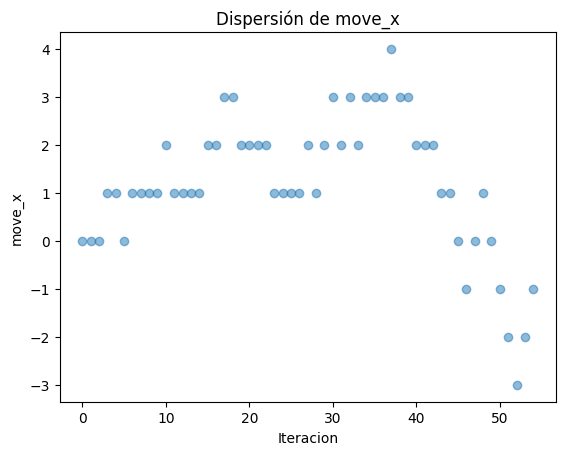

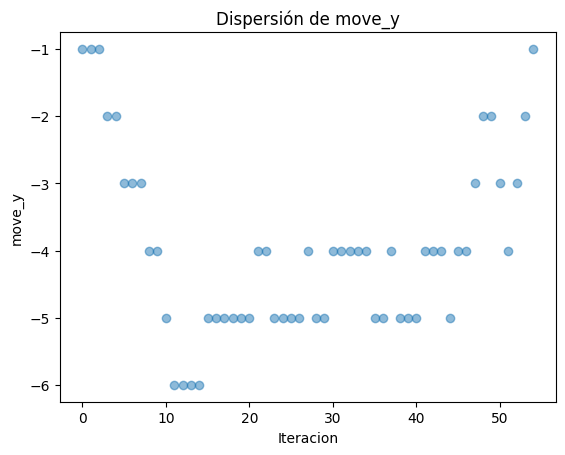

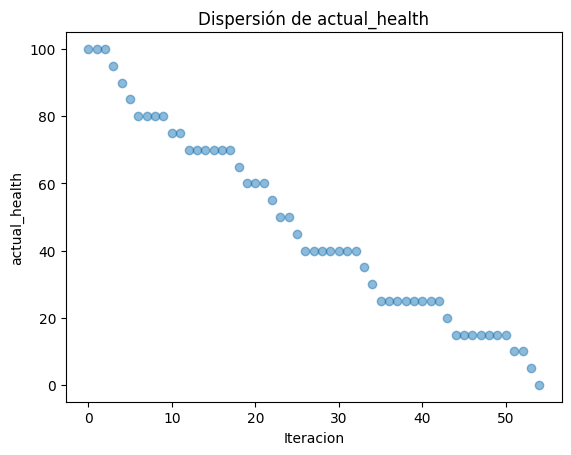

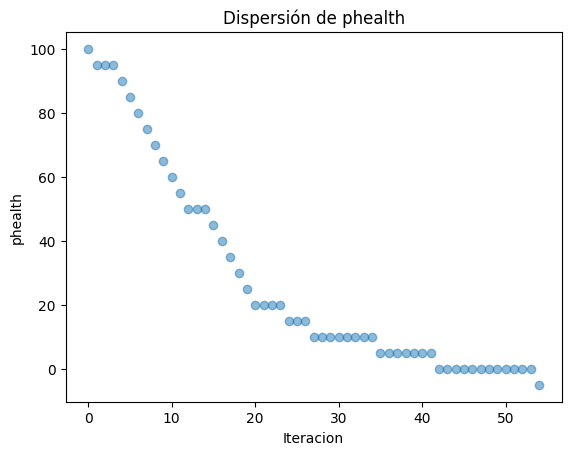

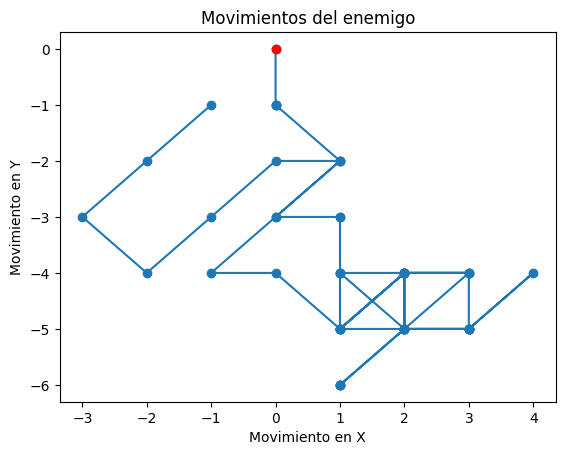

In [77]:
num_samples = 100
enemy_sim, num_samples, success = enemy_montecarlo(num_samples, 5)

import matplotlib.pyplot as plt

for var in enemy_sim.keys():
        plt.scatter(range(num_samples), enemy_sim[var], alpha=0.5)
        plt.xlabel('Iteracion')
        plt.ylabel(var)
        plt.title(f'Dispersión de {var}')
        plt.show()

enemy_sim['move_x'].insert(0, 0)
enemy_sim['move_y'].insert(0, 0)
plt.plot(enemy_sim['move_x'], enemy_sim['move_y'], linestyle='-', marker='o')
plt.plot(0, 0, marker='o', color='red')
plt.xlabel('Movimiento en X')
plt.ylabel('Movimiento en Y')
plt.title('Movimientos del enemigo')
plt.show()